In [10]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from everywhereml.code_generators.tensorflow import convert_model


In [11]:
def load_Xy():
  """
  Load data
  It may be a CSV file or whatever
  """
  return load_iris(return_X_y=True)

In [12]:
def get_Xy():
  """
  Normalize X
  One-hot encode y
  """
  X, y = load_Xy()
  X = np.asarray(X)
  y = np.asarray(y)
  num_classes = y.max()
  eye = np.eye(num_classes + 1)
  X_norm = MinMaxScaler().fit_transform(X)
  y_hot = np.asarray([eye[yi] for yi in y], dtype=int)
  return X_norm, y_hot


In [13]:
"""
Instantiate NN for classification
"""
def instantiate_nn_for_classification(input_shape, num_classes):
  model = tf.keras.Sequential()
  model.add(layers.Dense(32, activation='relu', input_shape=input_shape))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [14]:
"""
Split data between train, validation and test
"""
from sklearn.model_selection import train_test_split
X, y = get_Xy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
y_train, test_size=0.3)


In [15]:
"""
Instantiate NN for classification
"""
def instantiate_nn_for_classification(input_shape, num_classes):
  model = tf.keras.Sequential()
  model.add(layers.Dense(32, activation='relu', input_shape=input_shape))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [16]:
"""
Split data between train, validation and test
"""
from sklearn.model_selection import train_test_split
X, y = get_Xy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
y_train, test_size=0.3)


In [17]:
"""
Train model
"""
input_shape = X.shape[1:]
num_classes = y.shape[1]
model = instantiate_nn_for_classification(input_shape, num_classes)
model.summary()
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))
print(history.history.keys())



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 739 (2.89 KB)

 Trainable params: 739 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

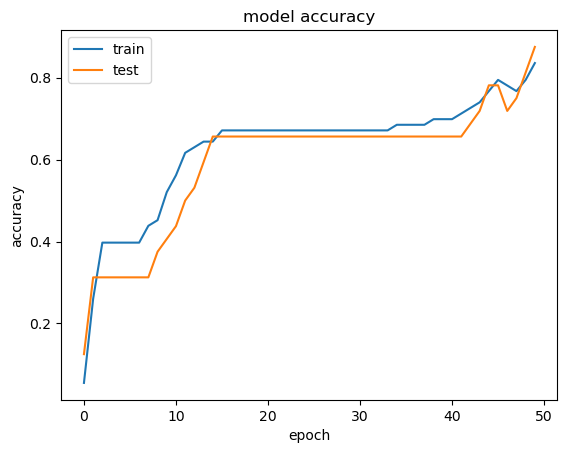

In [18]:
# plot history accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
"""
Export NN to C++
Copy-paste the generated code inside a file named model.h or irisModel.h
in your Arduino project
"""
from everywhereml.code_generators.tensorflow import convert_model
out = convert_model(model, X, y, model_name='irisModel')
print(out)
with open('.\cnn.h', 'w') as file:
    file.write(out)


INFO:tensorflow:Assets written to: C:\Users\Enmanuel\AppData\Local\Temp\tmp0mjql5r9\assets
